In [1]:
from mercantile import *
import requests
from PIL import Image
from io import BytesIO
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
API_KEY = 'pk.eyJ1IjoidG9iaWFzZnJpZGVuIiwiYSI6ImNqc296bXVjejBnbDc0M29lYXo1cnc0djUifQ.iEcEdqqDshW1g9_89XMXxw'

In [3]:
coords = [
          [
            [
              11.93441390991211,
              57.70488096416631
            ],
            [
              11.951923370361328,
              57.70488096416631
            ],
            [
              11.951923370361328,
              57.71331778871742
            ],
            [
              11.93441390991211,
              57.71331778871742
            ],
            [
              11.93441390991211,
              57.70488096416631
            ]
          ]
        ]
        

In [4]:
bbox = LngLatBbox(
    coords[0][0][0],
    coords[0][0][1],
    coords[0][2][0],
    coords[0][2][1],
)

In [5]:
t = bounding_tile(*bbox)

In [6]:
uri = 'https://api.mapbox.com/v4/mapbox.terrain-rgb/{}/{}/{}.pngraw?access_token={}'.format(
    t.z,
    t.x,
    t.y,
    API_KEY
)

In [7]:
resp = requests.get(uri)
raw = BytesIO(resp.content)

In [8]:
resp.status_code

200

In [9]:
height = mpimg.pil_to_array(Image.open(raw))

In [10]:
json.dumps(feature(t))

'{"type": "Feature", "bbox": [11.93115234375, 57.70414723434192, 11.953125, 57.71588512774505], "id": "Tile(x=8735, y=4959, z=14)", "geometry": {"type": "Polygon", "coordinates": [[[11.93115234375, 57.70414723434192], [11.93115234375, 57.71588512774505], [11.953125, 57.71588512774505], [11.953125, 57.70414723434192], [11.93115234375, 57.70414723434192]]]}, "properties": {"title": "XYZ tile Tile(x=8735, y=4959, z=14)"}}'

In [11]:
uri_s = 'https://api.mapbox.com/v4/mapbox.satellite/{}/{}/{}.pngraw?access_token={}'.format(
    t.z,
    t.x,
    t.y,
    API_KEY
)
resp = requests.get(uri_s)
sat = mpimg.pil_to_array(Image.open(BytesIO(resp.content)))

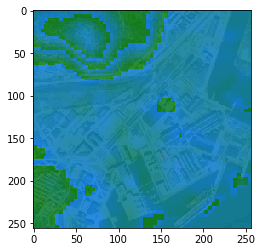

In [12]:
plt.imshow(sat)
plt.imshow(height, alpha=.75)
plt.show()

In [13]:
k = height.shape[0]
h = np.zeros(k*k)
for i in range(k):
    for j in range(k):
        rgb = height[i, j]
        h[i + j] = -10000 + ((rgb[0] * 256 * 256 + rgb[1] * 256 + rgb[2]) * 0.1)
print(np.max(h))
print(np.min(h))
print(np.mean(h))

48.20000000000073
-2.0
0.07543640136719193
